## Decision Tree
load dataset

In [32]:
#import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from imblearn.over_sampling import SMOTE

In [2]:
#Load the dataset
df = pd.read_csv("card_transdata.csv")

#display first 5 rows
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [3]:
#print statistic
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
len(df[df['fraud'] == 1])

87403

In [5]:
len(df[df['fraud'] == 0])

912597

In [6]:
#Split the data set into the input matrix and output vector
x = df.drop('fraud', axis=1)
y = df['fraud']

In [7]:
x

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1
999998,4.258729,0.242023,0.475822,1,0,0,1


In [8]:
y

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: fraud, Length: 1000000, dtype: int64

In [9]:
smote = SMOTE()
x, y = smote.fit_resample(x, y)

df = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
1825189,16.001177,5.945934,7.415418,1,0,0,1,1
1825190,12.411123,0.094194,6.850286,1,1,0,1,1
1825191,0.213349,0.376208,4.955911,0,1,0,1,1
1825192,7.663494,6.221709,4.904480,1,0,0,1,1


In [10]:
print(len(df[df['fraud'] == 1]))
print(len(df[df['fraud'] == 0]))

912597
912597


In [11]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=321)

d_tree = tree.DecisionTreeClassifier()

y_train = y_train.values;  #convert to numpy array
#print the total number of rows and column
print('x_train.shape:', x_train.shape) 
print('y_train shape:', y_train.shape)

d_tree.fit(x_train, y_train)
#predict using the same training 
y_pred=d_tree.predict(x_train)

def show10results(y_train, y_pred):
    print('\nResult for the 10 random samples: ')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {} pred = {}'.format(y_train[i], y_pred[i]))

y_pred_train=d_tree.predict(x_train)
show10results(y_train, y_pred_train) #predict value similar to the actual value

y_pred=d_tree.predict(x_test)
y_test = y_test.values;
show10results(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

x_train.shape: (1460155, 7)
y_train shape: (1460155,)

Result for the 10 random samples: 
actual = 0 pred = 0
actual = 0 pred = 0
actual = 1 pred = 1
actual = 1 pred = 1
actual = 1 pred = 1
actual = 0 pred = 0
actual = 0 pred = 0
actual = 0 pred = 0
actual = 0 pred = 0
actual = 0 pred = 0

Result for the 10 random samples: 
actual = 1 pred = 1
actual = 1 pred = 1
actual = 0 pred = 0
actual = 1 pred = 1
actual = 0 pred = 0
actual = 1 pred = 1
actual = 0 pred = 0
actual = 0 pred = 0
actual = 0 pred = 0
actual = 0 pred = 0
Accuracy: 0.9992822684699443


In [12]:
# calculate root mean square error
tree_mse=mean_squared_error(y_pred, y_test)
tree_rmse=np.sqrt(tree_mse)
print('RMSE =', tree_rmse)

RMSE = 0.026790511940903493


In [13]:
print('Training set score: {:.4f}'.format(d_tree.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(d_tree.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9993


# Evaluating using cross validation

In [36]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
k_fold_scores = cross_validate(d_tree, x, y, scoring = scoring, cv=10, return_train_score=True)

def display_scores(scores):
    print(scores.keys())
    print(scores['test_acc'])  
    
display_scores(k_fold_scores)

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[0.99939733 0.99921652 0.99924392 0.99901381 0.99925487 0.99926035
 0.99930966 0.99926035 0.99913434 0.99918365]


In [43]:
print('Train Accuracy:', k_fold_scores['test_acc'][3])
print('Train Precision:', k_fold_scores['test_acc'][5])
print('Train Recall:', k_fold_scores['test_acc'][7], '\n')

print('Test Accuracy:', k_fold_scores['test_acc'][2])
print('Test Precision:', k_fold_scores['test_acc'][4])
print('Test Recall:', k_fold_scores['test_acc'][6], '\n')

Train Accuracy: 0.9990138067061144
Train Precision: 0.9992603509771586
Train Recall: 0.9992603509771586 

Test Accuracy: 0.9992439184746877
Test Precision: 0.9992548720955079
Test Recall: 0.9993096609120147 



In [22]:
#cross validation predict
from sklearn.model_selection import cross_val_predict

# perform cross-validatied prediction using cross_val_predict
y_pred_cv = cross_val_predict(d_tree, x_train, y_train, cv=10)

def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
peek_results(y_train, y_pred_cv)  

actual |  Predicted
------------------
0  | 0
1  | 1
0  | 0
0  | 0
1  | 1
0  | 0
0  | 0
1  | 1
1  | 1
1  | 1
0  | 0
1  | 1
0  | 0
1  | 1
1  | 1
0  | 0
1  | 1
1  | 1
1  | 1
0  | 0


In [23]:
y_train=pd.DataFrame(y_train)
y_pred_cv=pd.DataFrame(y_pred_cv)

In [27]:
print('Training set score: {:.4f}'.format(d_tree.score(x_train, y_pred_cv)))

Training set score: 0.9992


In [16]:
from sklearn.tree import export_text
text_representation = export_text(d_tree)
print(text_representation)

|--- feature_2 <= 4.00
|   |--- feature_0 <= 100.00
|   |   |--- feature_1 <= 50.02
|   |   |   |--- feature_1 <= 49.67
|   |   |   |   |--- feature_1 <= 49.19
|   |   |   |   |   |--- feature_0 <= 98.51
|   |   |   |   |   |   |--- feature_1 <= 48.43
|   |   |   |   |   |   |   |--- feature_0 <= 96.54
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  96.54
|   |   |   |   |   |   |   |   |--- feature_0 <= 96.54
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  96.54
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  48.43
|   |   |   |   |   |   |   |--- feature_2 <= 3.91
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  3.91
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  98.51
|   |   |   |   |   |   |--- feature_1 <= 20.55
|   |   |   |   |   |   |   |--- class: 0
|   |   | 

In [26]:
print(classification_report(y_train, y_pred_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    730228
           1       1.00      1.00      1.00    729927

    accuracy                           1.00   1460155
   macro avg       1.00      1.00      1.00   1460155
weighted avg       1.00      1.00      1.00   1460155



# Fine Tuning 

In [18]:
#define parameters
parameters={"splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "min_samples_leaf":[3,5],
           "min_weight_fraction_leaf":[0.1,0.2],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30]}

In [19]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(d_tree, parameters, cv=5, scoring = 'neg_mean_squared_error')

print ('Performing grid search...', end = '')
# perform grid search
grid_search.fit(x_train, y_train)
print('done')

Performing grid search...

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\

C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Python\ai_prac\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


done


In [20]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3,
                       min_weight_fraction_leaf=0.1)

In [21]:
print('Best hyperparameter settings:', grid_search.best_params_)
print('RMSE of the best model =', np.sqrt(-grid_search.best_score_))

Best hyperparameter settings: {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
RMSE of the best model = 0.256211632768054


# Test Result

In [14]:
#predicting on the test case
best_model = d_tree
y_pred_best=best_model.predict(x_test)
final_mse=mean_squared_error(y_test, y_pred_best)
final_rmse=np.sqrt(final_mse)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_best))
print("RMSE:", final_rmse)

Accuracy: 0.9992822684699443
RMSE: 0.026790511940903493


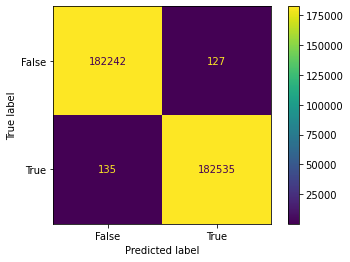

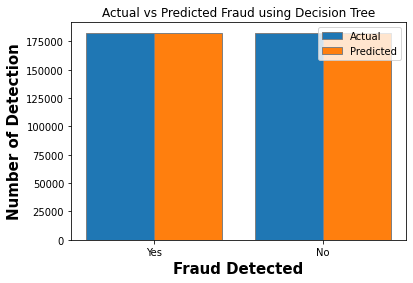

In [15]:
import matplotlib.pyplot as plt

def plotGraph(y_train,y_pred_cv,title):
    fraud = ['Yes', 'No']
    r = np.arange(2)
    train = [len(y_train[y_train == 1]), len(y_train[y_train == 0])]
    pred = [len(y_pred_cv[y_pred_cv == 1]), len(y_pred_cv[y_pred_cv == 0])]
    plt.bar(r - 0.2, train, width = 0.4, edgecolor ='grey', label ='Actual')
    plt.bar(r + 0.2, pred, width = 0.4, edgecolor ='grey', label ='Predicted')

    # Adding Xticks
    plt.xticks(r, fraud)
    plt.xlabel('Fraud Detected', fontweight ='bold', fontsize = 15)
    plt.ylabel('Number of Detection', fontweight ='bold', fontsize = 15)

    plt.legend()
    plt.title(title)
    plt.show()
    
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_best)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

plotGraph(y_test, y_pred_best, "Actual vs Predicted Fraud using Decision Tree")

### Save Model

In [17]:
import pickle

# save model to disk
pickle.dump(best_model, open('dt_model.pkl','wb'))